In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

In [2]:
def integration_indexes(x, a, b):
    idx_a = np.argmin(np.abs(x - a))
    idx_b = np.argmin(np.abs(x - b))
    return idx_a, idx_b

In [3]:
def phase_change(f, d):
    return 4 * np.pi * f * d / sc.c

In [4]:
def get_signals(t, f, d, I0=0.5, I1=0.5, E=0, M=0):
    """
    t ... time
    f ... frequency
    d ... distance
    I0 ... transmision signal intensity
    I1 ... reflection signal intensity

    returns:
    T ... Transmision signal
    R ... Reflection signal
    M_0 ... 0 phase modulation signal 
    M_1 ... 90 phase modulation signal
    M_2 ... 180 phase modulation signal
    M_3 ... 270 phase modulation signal
    """
    
    T = I0 * np.sin(2 * np.pi * f * t) + E

    R = I1 * np.sin(2 * np.pi * f * t - phase_change(f, d)) + E

    M_0 = np.sin(2 * np.pi * f * t) + M
    M_1 = np.sin(2 * np.pi * f * t - np.pi / 2) + M
    M_2 = np.sin(2 * np.pi * f * t - np.pi) + M
    M_3 = np.sin(2 * np.pi * f * t - 3 * np.pi / 2) + M

    return T, R, M_0, M_1, M_2, M_3

In [5]:
def simulate(set_d=None):
    if (set_d != None):
        d_ = set_d
    else:
        d_ = d

    # Signals    
    _, s_r, s_m00, s_m90, *_ = get_signals(t, f, d_, I0, I1)

    # Integration
    s_m00r = s_m00 * s_r
    s_m90r = s_m90 * s_r

    n = 100
    T_int = n * tp

    a, b = integration_indexes(t, 0, T_int)
    s_m00r_int = np.trapz(s_m00r[a:b], t[a:b])
    s_m90r_int = np.trapz(s_m90r[a:b], t[a:b]) 

    # Results
    pc_calc = np.arctan2(s_m90r_int, s_m00r_int)
    d_calc = pc_calc * sc.c / (4 * np.pi * f)

    if pc_calc < 0:
        pc_calc += 2 * np.pi
    
    if d_calc < 0:
        d_calc += sc.c / f / 2

    return pc_calc, d_calc

In [27]:

def plot_signals(sim=False):
    s_t, s_r, s_m_0, s_m_90, *_ = get_signals(t, f, d, I0, I1)
    s_rs = s_r * s_m_0 
    s_r90s = s_r * s_m_90
    lim = 100


    plt.figure(figsize=(12, 8))

    plt.subplot(2,2,1) if not sim else plt.subplot(2,4,(1,2))
    plt.title("Transmited and modulation signals")
    plt.plot(t_ns, s_m_0, label="0 phase modulated signal", color="#55a9aa")
    plt.plot(t_ns, s_m_90, label="90 phase modulated signal", color="orange")
    plt.plot(t_ns, s_t, label="Transmitted signal", color="#2444ca", linewidth=3)
    plt.xlim(0, lim)
    plt.xlabel("Time [ns]")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    plt.subplot(2,2,2) if not sim else plt.subplot(2,4,(3,4))
    plt.title("Reflected and modulation signals")
    plt.plot(t_ns, s_m_0, label="0 phase modulated signal", color="#55a9aa")
    plt.plot(t_ns, s_m_90, label="90 phase modulated signal", color="orange")
    plt.plot(t_ns, s_r, label="Reflected signal", color="#ca2444", linewidth=3)
    plt.xlabel("Time [ns]")
    plt.ylabel("Amplitude")
    plt.xlim(0, lim)
    plt.grid()
    plt.legend()

    plt.subplot(2,1,2) if not sim else plt.subplot(2,4,(5,7))
    plt.xlim(0, lim)
    plt.title("Product of reflected and modulation signals")
    plt.plot(t_ns, s_rs, label="Reflected and 0 phase modulated signal", color="#55a9aa")
    plt.plot(t_ns, s_r90s, label="Reflected and 90 phase modulated signal", color="orange")
    plt.xlabel("Time [ns]")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    if sim:
        ds = np.array([(*simulate(d), d) for d in np.arange(0, wl, wl / 100)])

        plt.subplot(248)
        plt.title("Phase change and distance")
        plt.plot(ds[:, 2], ds[:, 0], label="Distance", color="#55a9aa")
        plt.ylabel("Phase change [rad]")
        plt.xlabel("Distance [m]")
        plt.grid()

    plt.tight_layout()

    plt.show()

In [28]:
t = np.arange(0, 1e-7, 1e-12)
t_ns = t * 1e9

# Laser parameters
f = 1e7 # frequency [Hz]
I0 = 0.5 # transmision signal intensity

# Calculated parameters
wl = sc.c / f # wavelength [m]
tp = 1 / f    # period [s]

print("Laser Parameters:")
print(" - Frequency: {:.2f} MHz".format(f*1e-6))
print(" - Wavelength: {:.2f} m".format(wl))
print(" - Period: {:.2f} ns".format(tp*1e9))

Laser Parameters:
 - Frequency: 10.00 MHz
 - Wavelength: 29.98 m
 - Period: 100.00 ns


In [29]:
# Case parameters
I1 = 0.5 # reflection signal intensity
d = 0 # distance [m]
pc = phase_change(f, d) # phase change [rad]

pc_calc, d_calc = simulate()

print(f"{'':>20} | {'expected':>10} | {'calculated':>10} |")
print(f"{'Distance [m]':>20} | {d:10.2f} | {d_calc:10.2f} |")
print(f"{'Phase change [rad]':>20} | {pc:10.2f} | {pc_calc:10.2f} |")

                     |   expected | calculated |
        Distance [m] |       0.00 |      14.99 |
  Phase change [rad] |       0.00 |       6.28 |


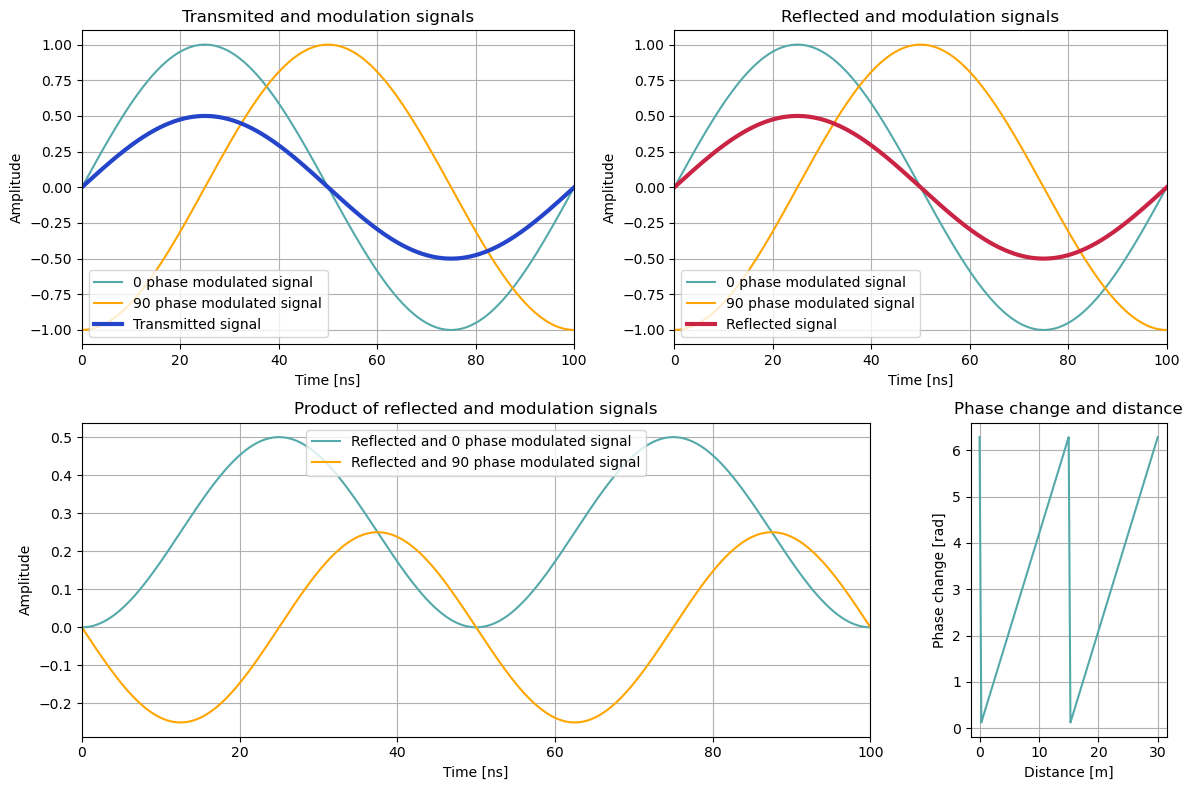

In [30]:
plot_signals(sim=True)

In [13]:
def simulate_2(set_d=None):
    if (set_d != None):
        d_ = set_d
    else:
        d_ = d

    # Signals    
    _, s_r, s_m00, s_m90, sm180, sm270 = get_signals(t, f, d_, I0, I1)

    # Integration
    s_m00r = s_m00 * s_r
    s_m90r = s_m90 * s_r
    s_m180r = sm180 * s_r
    s_m270r = sm270 * s_r
    
    n = 100
    T_int = n * tp

    a, b = integration_indexes(t, 0, T_int)
    s_m00r_int = np.trapz(s_m00r[a:b], t[a:b])
    s_m90r_int = np.trapz(s_m90r[a:b], t[a:b]) 
    s_m180r_int = np.trapz(s_m180r[a:b], t[a:b])
    s_m270r_int = np.trapz(s_m270r[a:b], t[a:b])

    # Results
    pc_calc = np.arctan2(s_m90r_int - s_m270r_int, s_m00r_int - s_m180r_int)
    d_calc = pc_calc * sc.c / (4 * np.pi * f)

    if pc_calc < 0:
        pc_calc += 2 * np.pi
    
    if d_calc < 0:
        d_calc += sc.c / f / 2

    return pc_calc, d_calc

In [25]:

def plot_signals_2(sim=False):
    s_t, s_r, s_m_0, s_m_90, s_m_180, s_m_270 = get_signals(t, f, d, I0, I1, M=2, E=2)
    s_rs = s_r * s_m_0 
    s_r90s = s_r * s_m_90
    s_r180s = s_r * s_m_180
    s_r270s = s_r * s_m_270
    lim = 100


    plt.figure(figsize=(12, 8))

    plt.subplot(2,2,1) if not sim else plt.subplot(2,4,(1,2))
    plt.title("Transmited and modulation signals")
    plt.plot(t_ns, s_m_0, label="0 phase modulated signal", color="#55a9aa")
    plt.plot(t_ns, s_m_90, label="90 phase modulated signal", color="orange")
    plt.plot(t_ns, s_t, label="Transmitted signal", color="#2444ca", linewidth=3)
    plt.xlim(0, lim)
    plt.xlabel("Time [ns]")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    plt.subplot(2,2,2) if not sim else plt.subplot(2,4,(3,4))
    plt.title("Reflected and modulation signals")
    plt.plot(t_ns, s_m_0, label="0 phase modulated signal", color="#55a9aa")
    plt.plot(t_ns, s_m_90, label="90 phase modulated signal", color="#55797a")
    plt.plot(t_ns, s_m_180, label="180 phase modulated signal", color="#55595a")
    plt.plot(t_ns, s_m_270, label="270 phase modulated signal", color="#55292a")
    plt.plot(t_ns, s_r, label="Reflected signal", color="#ca2444", linewidth=3)
    plt.xlabel("Time [ns]")
    plt.ylabel("Amplitude")
    plt.xlim(0, lim)
    plt.grid()
    plt.legend()

    plt.subplot(2,1,2) if not sim else plt.subplot(2,4,(5,7))
    plt.xlim(0, lim)
    plt.title("Product of reflected and modulation signals")
    plt.plot(t_ns, s_rs, label="Reflected and 0 phase modulated signal", color="#55a9aa")
    plt.plot(t_ns, s_r90s, label="Reflected and 90 phase modulated signal", color="orange")
    plt.plot(t_ns, s_r180s, label="Reflected and 180 phase modulated signal", color="#55797a")
    plt.plot(t_ns, s_r270s, label="Reflected and 270 phase modulated signal", color="#55595a")
    plt.xlabel("Time [ns]")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    if sim:
        ds = np.array([(*simulate_2(d), d) for d in np.arange(0, wl, wl / 100)])

        plt.subplot(248)
        plt.title("Phase change and distance")
        plt.plot(ds[:, 2], ds[:, 0], label="Distance", color="#55a9aa")
        plt.ylabel("Phase change [rad]")
        plt.xlabel("Distance [m]")
        plt.grid()

    plt.tight_layout()

    plt.show()

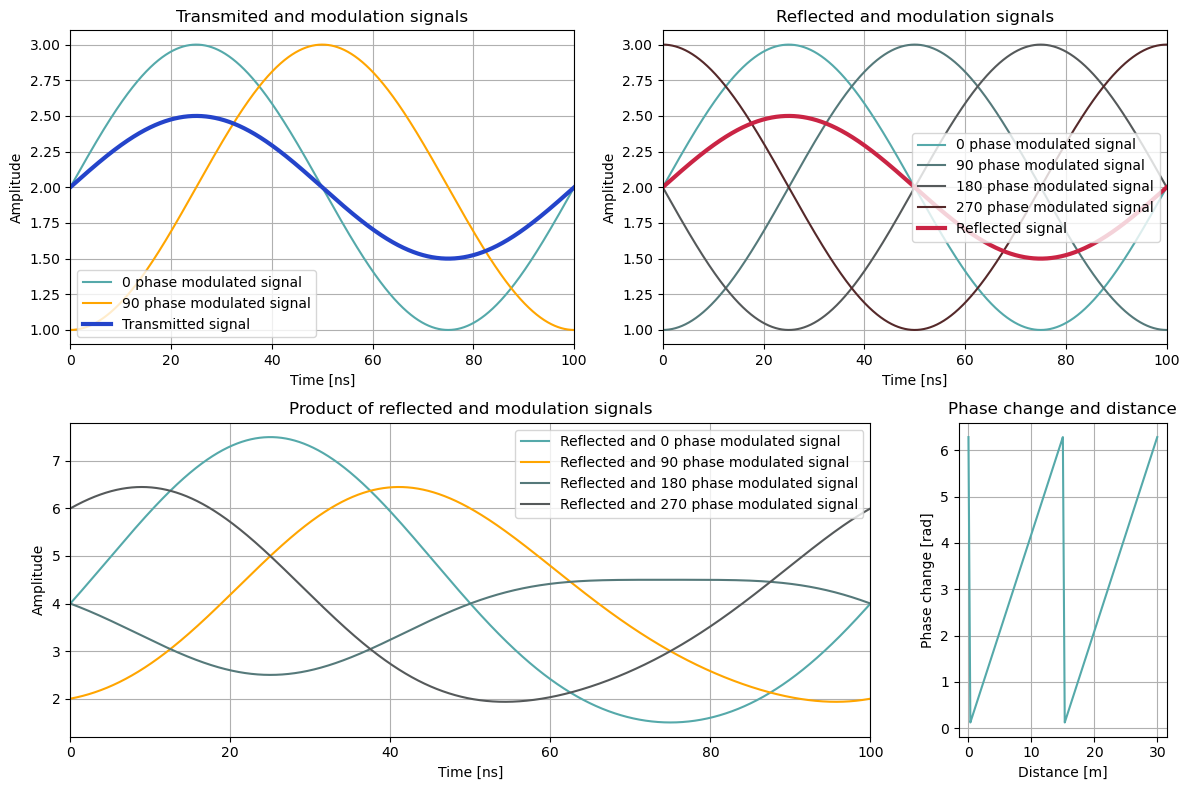

In [26]:
plot_signals_2(sim=True)